# Problem statement

The objective is to cluster the customers of an e-commerce platform into distinct groups based on their purchasing behavior.

The dataset contains the following columns:

- InvoiceNo (integer)
- StockCode (string)
- Description (string)
- Quantity (integer)
- InvoiceDate (date)
- UnitPrice (decimal)
- CustomerID (integer)
- Country (string)

By analyzing the TotalAmount spent and TotalTransactions made by each customer, the company aims to identify different customer segments for targeted marketing strategies, personalized product offerings, and improved customer service.

The clustering process involves data preprocessing, feature engineering, outlier detection and removal, data scaling, and optimal cluster determination through both the Elbow Method and Silhouette Score, culminating in the application of K-Means clustering to categorize customers into meaningful segments.

The notebook contains 6 exercises in total:

* [Exercise 1](#ex_1)
* [Exercise 2](#ex_2)
* [Exercise 3](#ex_3)
* [Exercise 4](#ex_4)
* [Exercise 5](#ex_5)
* [Exercise 6](#ex_6)

In [1]:
%pip install numpy pandas scikit-learn matplotlib seaborn 


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
#from sklearn_extra.cluster import KMeansExtra

# Step 1: Load the Dataset
#from google.colab import files
#uploaded = files.upload()

df = pd.read_csv('Datasets/clustering-data.csv', encoding='latin1')

Shape of the DataFrame: (541909, 8)

First few rows of the DataFrame:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Column names and data types:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     objec

/var/folders/fw/dbdfr76141z2rztwnjx6b4j40000gn/T/ipykernel_38658/14550844.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_segmentation['TotalAmount'], df_segmentation['TotalTransactions']], labels=['TotalAmount', 'TotalTransactions'])


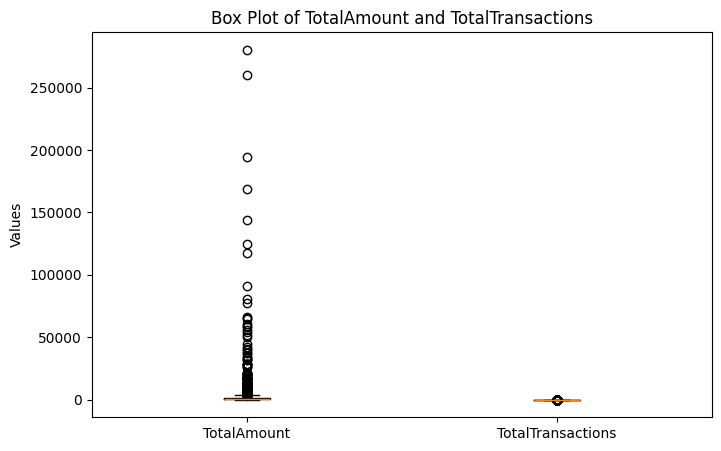

Shape of DataFrame after removing outliers: (3912, 2)


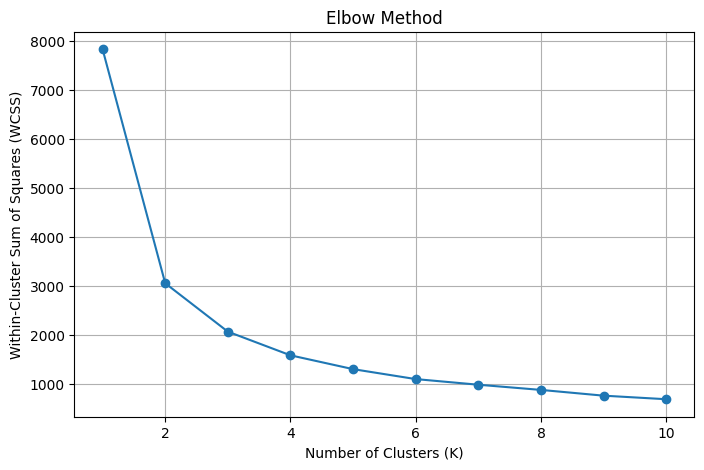

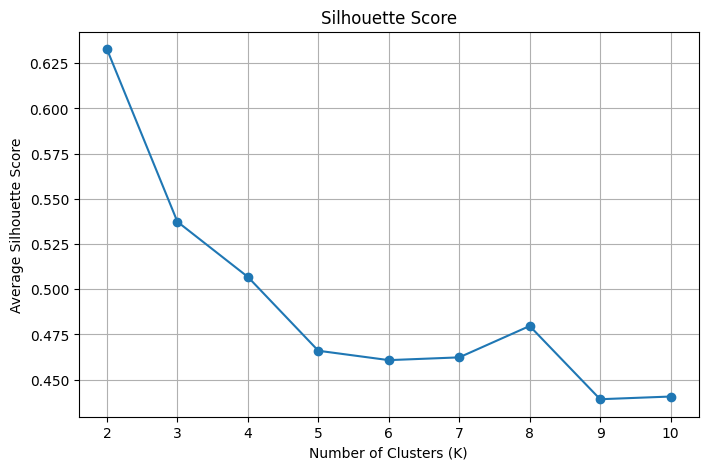

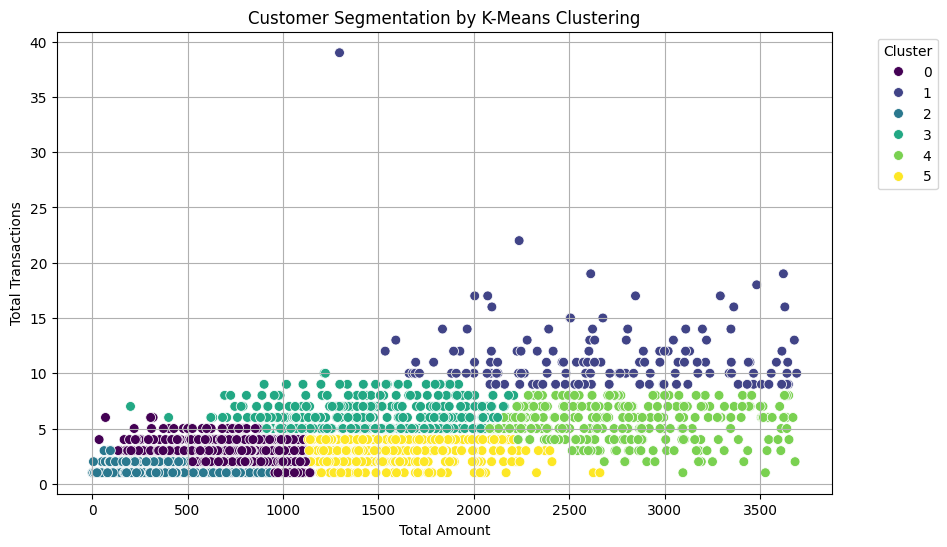

In [3]:
# Step 2: Inspect the Data
print("Shape of the DataFrame:", df.shape)
print("\nFirst few rows of the DataFrame:")
print(df.head())
print("\nColumn names and data types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())

# Step 3: Summary Statistics
summary_stats = df.describe(include='all')
print("\nSummary Statistics:")
print(summary_stats)

# Step 4: Data Preprocessing
df_cleaned = df.dropna(subset=['CustomerID'])
df_cleaned = df_cleaned[(df_cleaned['Quantity'] >= 0) & (df_cleaned['UnitPrice'] >= 0)]
columns_to_drop = ['StockCode', 'InvoiceDate', 'Description', 'Country']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Step 5: Feature Engineering
df_cleaned['Amount'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_total_amount = df_cleaned.groupby('CustomerID')['Amount'].sum().reset_index()
df_total_amount.rename(columns={'Amount': 'TotalAmount'}, inplace=True)
df_total_transactions = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
df_total_transactions.rename(columns={'InvoiceNo': 'TotalTransactions'}, inplace=True)
df_segmentation = pd.merge(df_total_amount, df_total_transactions, on='CustomerID')

# Step 6: Checking for Outliers
df_segmentation.drop('CustomerID', axis=1, inplace=True)
plt.figure(figsize=(8, 5))
plt.boxplot([df_segmentation['TotalAmount'], df_segmentation['TotalTransactions']], labels=['TotalAmount', 'TotalTransactions'])
plt.title('Box Plot of TotalAmount and TotalTransactions')
plt.ylabel('Values')
plt.show()

# Step 7: Removing Outliers from TotalAmount column
Q1 = df_segmentation['TotalAmount'].quantile(0.25)
Q3 = df_segmentation['TotalAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_segmentation = df_segmentation[(df_segmentation['TotalAmount'] >= lower_bound) & (df_segmentation['TotalAmount'] <= upper_bound)]
print("Shape of DataFrame after removing outliers:", df_segmentation.shape)

# Step 8: Data Scaling using Standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_segmentation)
df_scaled = pd.DataFrame(df_scaled, columns=df_segmentation.columns)

# Step 9: Finding Optimal Number of Clusters - Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# Step 10: Finding Optimal Number of Clusters - Silhouette Score Elbow Method
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score')
plt.grid(True)
plt.show()

# Step 11: Customer Segmentation K-Means Clustering with 6 Clusters
num_clusters = 6
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(df_scaled)
df_segmentation['Cluster'] = kmeans_model.labels_

# Step 12: Visualization of Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalAmount', y='TotalTransactions', hue='Cluster', data=df_segmentation, palette='viridis', s=50)
plt.xlabel('Total Amount')
plt.ylabel('Total Transactions')
plt.title('Customer Segmentation by K-Means Clustering')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


<a name="ex_1"></a>
# Exercise 1: Understanding the Importance of Removing Outliers

**Question**: In the context of data preprocessing, at the step mentioned in regarding the removal of outliers, explain why it is critical to remove outliers before training a machine learning model. Discuss the potential impacts of outliers on model performance and accuracy.

**Answer**: Write your answer here

### Importance of Removing Outliers in Data Preprocessing

Removing outliers is a crucial step in data preprocessing before training a machine learning model. Here's why it's important and how outliers can impact model performance and accuracy:

#### Importance of Removing Outliers:

1. **Data Integrity**:
   - Outliers can distort the true representation of the data. They may arise from errors in data collection, entry, or measurement, and can lead to misleading insights if not addressed.

2. **Model Performance**:
   - **Impact on Training**: Outliers can skew the training process, especially for models sensitive to the scale of data, such as linear regression. They can disproportionately influence the model's parameters, leading to suboptimal performance.
   - **Impact on Predictions**: Models trained on data with outliers may produce biased predictions, as the model might overfit to these extreme values rather than capturing the underlying pattern of the data.

3. **Statistical Assumptions**:
   - Many machine learning algorithms assume that the data follows a certain distribution (e.g., normal distribution). Outliers can violate these assumptions, leading to inaccurate model estimates and predictions.

4. **Model Accuracy**:
   - Outliers can reduce the accuracy of a model by increasing the error rate. For instance, in regression tasks, outliers can inflate the mean squared error, making the model appear less accurate than it actually is.

5. **Robustness**:
   - Removing outliers can make the model more robust and generalizable to new, unseen data. A model that is less influenced by extreme values is likely to perform better on a variety of datasets.

#### Potential Impacts of Outliers:

1. **Increased Variance**:
   - Outliers can increase the variance of the model, making it more sensitive to small changes in the input data. This can lead to overfitting, where the model performs well on the training data but poorly on unseen data.

2. **Misleading Metrics**:
   - Outliers can skew performance metrics, such as mean squared error or R-squared, giving a false impression of model performance.

3. **Algorithm-Specific Effects**:
   - Some algorithms, like k-means clustering and k-nearest neighbors, are particularly sensitive to outliers because they rely on distance calculations. Outliers can disproportionately affect the clustering or classification results.

#### Conclusion:

Removing outliers is a critical step in ensuring that a machine learning model is trained on data that accurately represents the underlying patterns. By addressing outliers, you can improve the model's performance, accuracy, and robustness, leading to more reliable and generalizable predictions. However, it's also important to carefully consider the context and reason for outliers, as they might sometimes represent important variations in the data rather than errors.

<a name="ex_2"></a>
# Exercise 2: Exploring Alternative Scaling Techniques

**Question**: The notebook utilizes StandardScaler() for feature scaling. Identify at least one alternative scaling method that could be used in place of StandardScaler(). Implement this alternative method in the notebook and present the results of scaling the dataframe. Briefly compare the outcomes between the two scaling methods.

MinMax Scaled DataFrame:
   TotalAmount  TotalTransactions  Cluster
0     0.486756           0.078947      1.0
1     0.476007           0.000000      1.0
2     0.090567           0.000000      0.4
3     0.678724           0.184211      0.8
4     0.024104           0.000000      0.4

Standard Scaled DataFrame:
   TotalAmount  TotalTransactions   Cluster
0     1.099421           0.425738  1.987375
1     1.051512          -0.745491  1.987375
2    -0.666340          -0.745491 -0.012439
3     1.954997           1.987377  1.320770
4    -0.962557          -0.745491 -0.012439

Comparison between StandardScaler and MinMaxScaler:
StandardScaler: Centers the data by subtracting the mean and scales it by dividing by the standard deviation.
MinMaxScaler: Scales the data to a fixed range, usually [0, 1], by subtracting the minimum value and dividing by the range (max - min).


/var/folders/fw/dbdfr76141z2rztwnjx6b4j40000gn/T/ipykernel_38658/97988790.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_segmentation_minmax_scaled['TotalAmount'], df_segmentation_minmax_scaled['TotalTransactions']], labels=['TotalAmount', 'TotalTransactions'])
/var/folders/fw/dbdfr76141z2rztwnjx6b4j40000gn/T/ipykernel_38658/97988790.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_segmentation_standard_scaled['TotalAmount'], df_segmentation_standard_scaled['TotalTransactions']], labels=['TotalAmount', 'TotalTransactions'])


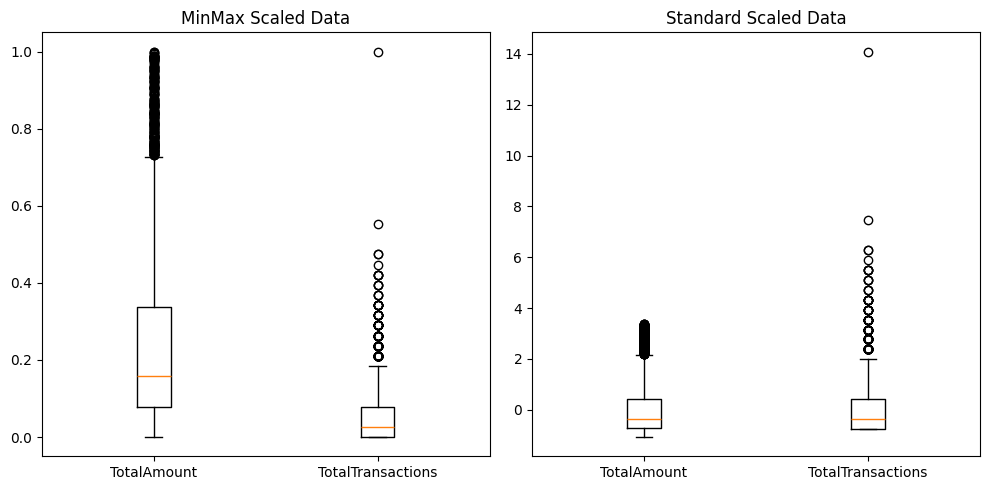

In [5]:
# Write your code here
from sklearn.preprocessing import MinMaxScaler

# Assuming df_segmentation is the dataframe to be scaled
# Using MinMaxScaler as an alternative to StandardScaler
min_max_scaler = MinMaxScaler()
df_segmentation_minmax_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_segmentation), columns=df_segmentation.columns)

# Display the first few rows of the scaled dataframe
print("MinMax Scaled DataFrame:")
print(df_segmentation_minmax_scaled.head())

# Compare the outcomes between StandardScaler and MinMaxScaler
# StandardScaler scales the data to have a mean of 0 and a standard deviation of 1
standard_scaler = StandardScaler()
df_segmentation_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df_segmentation), columns=df_segmentation.columns)

print("\nStandard Scaled DataFrame:")
print(df_segmentation_standard_scaled.head())

# Brief comparison
print("\nComparison between StandardScaler and MinMaxScaler:")
print("StandardScaler: Centers the data by subtracting the mean and scales it by dividing by the standard deviation.")
print("MinMaxScaler: Scales the data to a fixed range, usually [0, 1], by subtracting the minimum value and dividing by the range (max - min).")

import matplotlib.pyplot as plt

# Plotting the MinMax Scaled DataFrame
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot([df_segmentation_minmax_scaled['TotalAmount'], df_segmentation_minmax_scaled['TotalTransactions']], labels=['TotalAmount', 'TotalTransactions'])
plt.title('MinMax Scaled Data')

# Plotting the Standard Scaled DataFrame
plt.subplot(1, 2, 2)
plt.boxplot([df_segmentation_standard_scaled['TotalAmount'], df_segmentation_standard_scaled['TotalTransactions']], labels=['TotalAmount', 'TotalTransactions'])
plt.title('Standard Scaled Data')

plt.tight_layout()
plt.show()


<a name="ex_3"></a>
# Exercise 3: Comparing Cluster Evaluation Metrics

**Question**: Describe the difference between the Silhouette Score and the Elbow Method in determining the optimal number of clusters for K-means clustering. Discuss the advantages and limitations of each method.

**Answer**: Write your answer here
 
 The Silhouette Score and the Elbow Method are two techniques used to determine the optimal number of clusters in K-means clustering.

##**The Silhouette Score** 
Measures how similar an object is to its own cluster compared to other clusters. 

It ranges from -1 to 1, where a higher value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. 
The average Silhouette Score over all objects provides an indication of the overall clustering quality. A higher average Silhouette Score suggests a better-defined clustering structure.

### Advantages of the Silhouette Score:
    - Provides a clear indication of how well each object lies within its cluster.
    - Can be used to compare the quality of different clustering solutions.

### Limitations of the Silhouette Score:
    - Computationally expensive for large datasets, as it requires calculating distances between all pairs of points.
    - May not perform well with clusters of varying density or non-globular shapes.

##**The Elbow Method** 
Involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and looking for an "elbow" point where the rate of decrease sharply slows. 
The idea is that adding more clusters beyond this point does not significantly improve the clustering quality, indicating the optimal number of clusters.

### Advantages of the Elbow Method:
    - Simple and intuitive to understand and implement.
    - Provides a visual way to determine the optimal number of clusters.

### Limitations of the Elbow Method:
    - The "elbow" point can be ambiguous or hard to identify, especially if the decrease in WCSS is gradual.
    - May not work well for datasets with complex structures or varying cluster sizes.

In summary, the Silhouette Score provides a quantitative measure of clustering quality, while the Elbow Method offers a visual approach to determine the optimal number of clusters. 
Both methods have their advantages and limitations, and it is often useful to use them in combination to make a more informed decision.


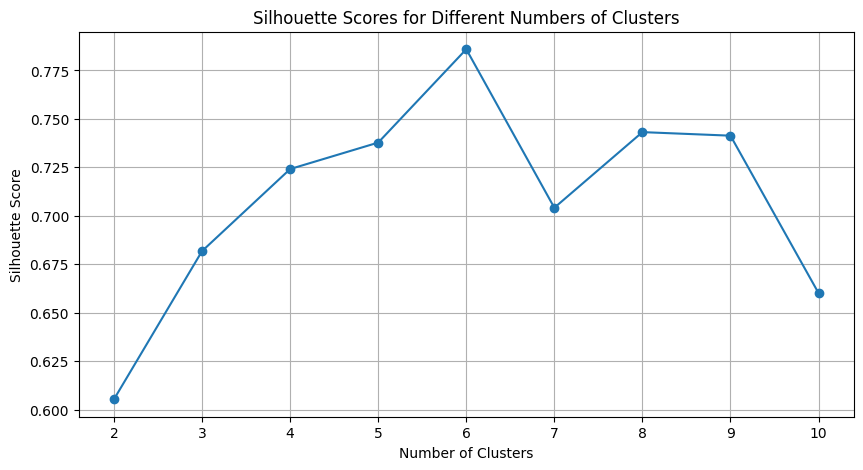

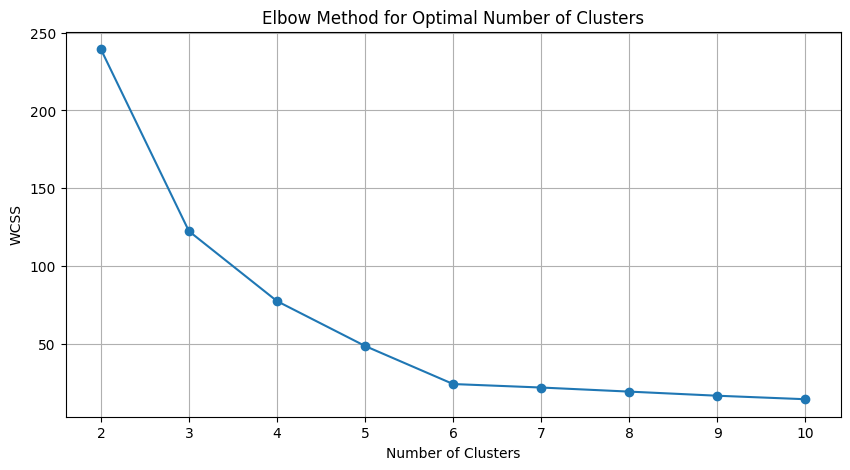

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming df_segmentation_minmax_scaled is already defined in the notebook

# Define a range of cluster numbers to evaluate
range_n_clusters = list(range(2, 11))

# Initialize lists to store the silhouette scores and WCSS values
silhouette_scores = []
wcss = []

for n_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the KMeans model
    cluster_labels = kmeans.fit_predict(df_segmentation_minmax_scaled)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(df_segmentation_minmax_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Calculate the within-cluster sum of squares (WCSS)
    wcss.append(kmeans.inertia_)

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Plot the Elbow Method (WCSS)
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


<a name="ex_4"></a>
# Exercise 4: Understanding K-means Clustering

**Question**: Based on the code provided in the notebook and your own knowledge, explain how the K-means algorithm works. Include a discussion on the initialization of centroids, assignment of points to the nearest cluster, the process of updating centroids, and the convergence criteria for the algorithm.

**Answer**: Write your answer here

The K-means algorithm is a popular clustering method used to partition a dataset into K distinct, non-overlapping subsets or clusters. Here's a step-by-step explanation of how the K-means algorithm works:

#### 1. **Initialization of Centroids**:
    - The algorithm starts by initializing K centroids randomly. These centroids are the initial points that will be used to form the clusters.

#### 2. **Assignment of Points to the Nearest Cluster**:
    - Each data point in the dataset is assigned to the nearest centroid based on the Euclidean distance. This forms K clusters where each point belongs to the cluster with the nearest centroid.

#### 3. **Updating Centroids**:
   - Once all points are assigned to clusters, the centroids are updated. The new centroid of each cluster is calculated as the mean of all points in that cluster.
##
#### 4. **Convergence Criteria**:
    - Steps 2 and 3 are repeated iteratively until the centroids no longer change significantly, or a maximum number of iterations is reached. This indicates that the algorithm has converged, and the clusters are stable.
##
The goal of K-means is to minimize the within-cluster sum of squares (WCSS), which measures the variance within each cluster.
##
Example and Visualization:


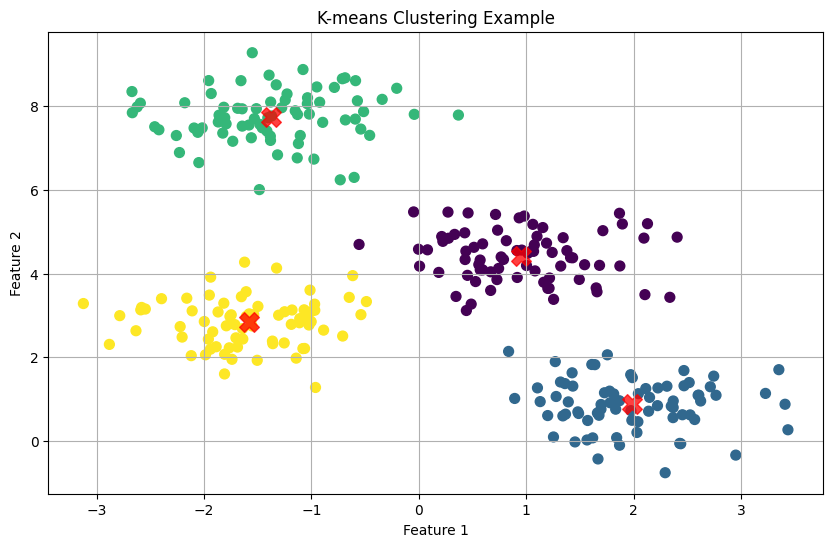

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Initialize KMeans with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Get the cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the data points and centroids
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-means Clustering Example')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

<a name="ex_5"></a>
# Exercise 5: Change Clustering Algorithm

- Research Alternative Clustering Algorithm beyond K-Means such as Hierarchical Clustering, DBSCAN (Density-Based Spatial Clustering of Applications with Noise), and Gaussian Mixture Models (GMM).
- Choose one alternative algorithm to explore.
- Implement the Chosen Algorithm
- Visualize the Results: Similar to how the K-Means results were visualized, plot the clusters determined by the new algorithm. Compare these clusters based on TotalAmount and TotalTransactions.
- Discuss how the clusters formed by the new algorithm differ from those created by K-Means

- Research Alternative Clustering Algorithm that is not K-Means such as Hierarchical Clustering, not DBSCAN (Density-Based Spatial Clustering of Applications with Noise), and not Gaussian Mixture Models (GMM).
- Choose one alternative algorithm to explore.
- Implement the Chosen Algorithm
- Visualize the Results: Similar to how the K-Means results were visualized, plot the clusters determined by the new algorithm. Compare these clusters based on TotalAmount and TotalTransactions.
- Discuss how the clusters formed by the new algorithm differ from those created by K-Means

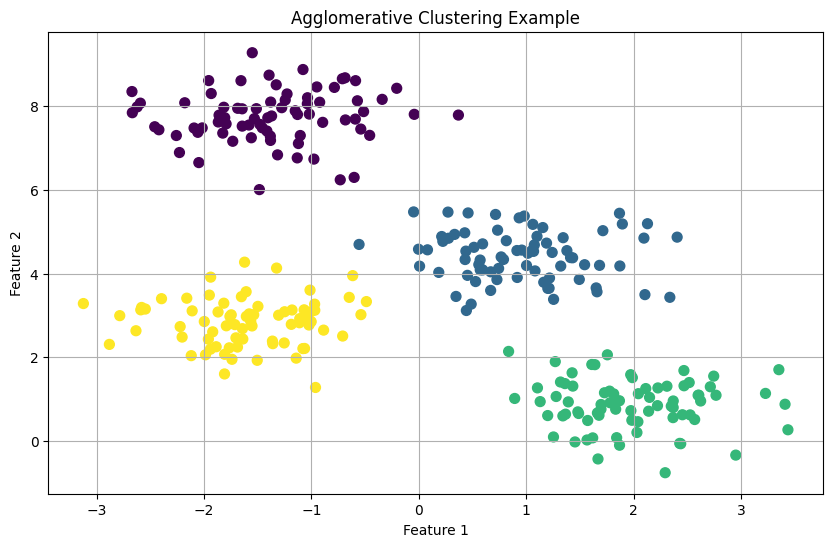

In [8]:
# Write your code here
from sklearn.cluster import AgglomerativeClustering

# Initialize Agglomerative Clustering with 4 clusters
agg_clustering = AgglomerativeClustering(n_clusters=4)
labels_agg = agg_clustering.fit_predict(X)

# Plot the data points and centroids
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_agg, s=50, cmap='viridis')
plt.title('Agglomerative Clustering Example')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()



 The clusters formed by Agglomerative Clustering differ from those created by K-Means in several ways:
 
 1. **Cluster Shape and Boundaries**: K-Means tends to form spherical clusters due to its reliance on the mean as the centroid. In contrast, Agglomerative Clustering can form clusters of various shapes since it merges clusters based on the distance between points or clusters.
 
 2. **Cluster Size**: K-Means aims to create clusters of similar size, while Agglomerative Clustering does not have this constraint. This can result in clusters of varying sizes when using Agglomerative Clustering.
 
 3. **Sensitivity to Noise and Outliers**: K-Means can be sensitive to noise and outliers, as they can significantly affect the position of the centroids. Agglomerative Clustering, on the other hand, is less sensitive to noise and outliers because it focuses on the distance between points or clusters rather than the mean.
 
 4. **Hierarchical Structure**: Agglomerative Clustering creates a hierarchical structure of clusters, which can be visualized using a dendrogram. This provides more insight into the data's structure and allows for different levels of granularity in clustering. K-Means does not provide such a hierarchical structure.
 
 5. **Initialization**: K-Means requires an initial guess for the centroids, which can affect the final clusters. Agglomerative Clustering does not require such initialization, making it less dependent on initial conditions.
 
 Overall, Agglomerative Clustering can provide more flexibility in terms of cluster shapes and sizes, and it offers a hierarchical view of the data. However, it may be more computationally intensive compared to K-Means, especially for large datasets.


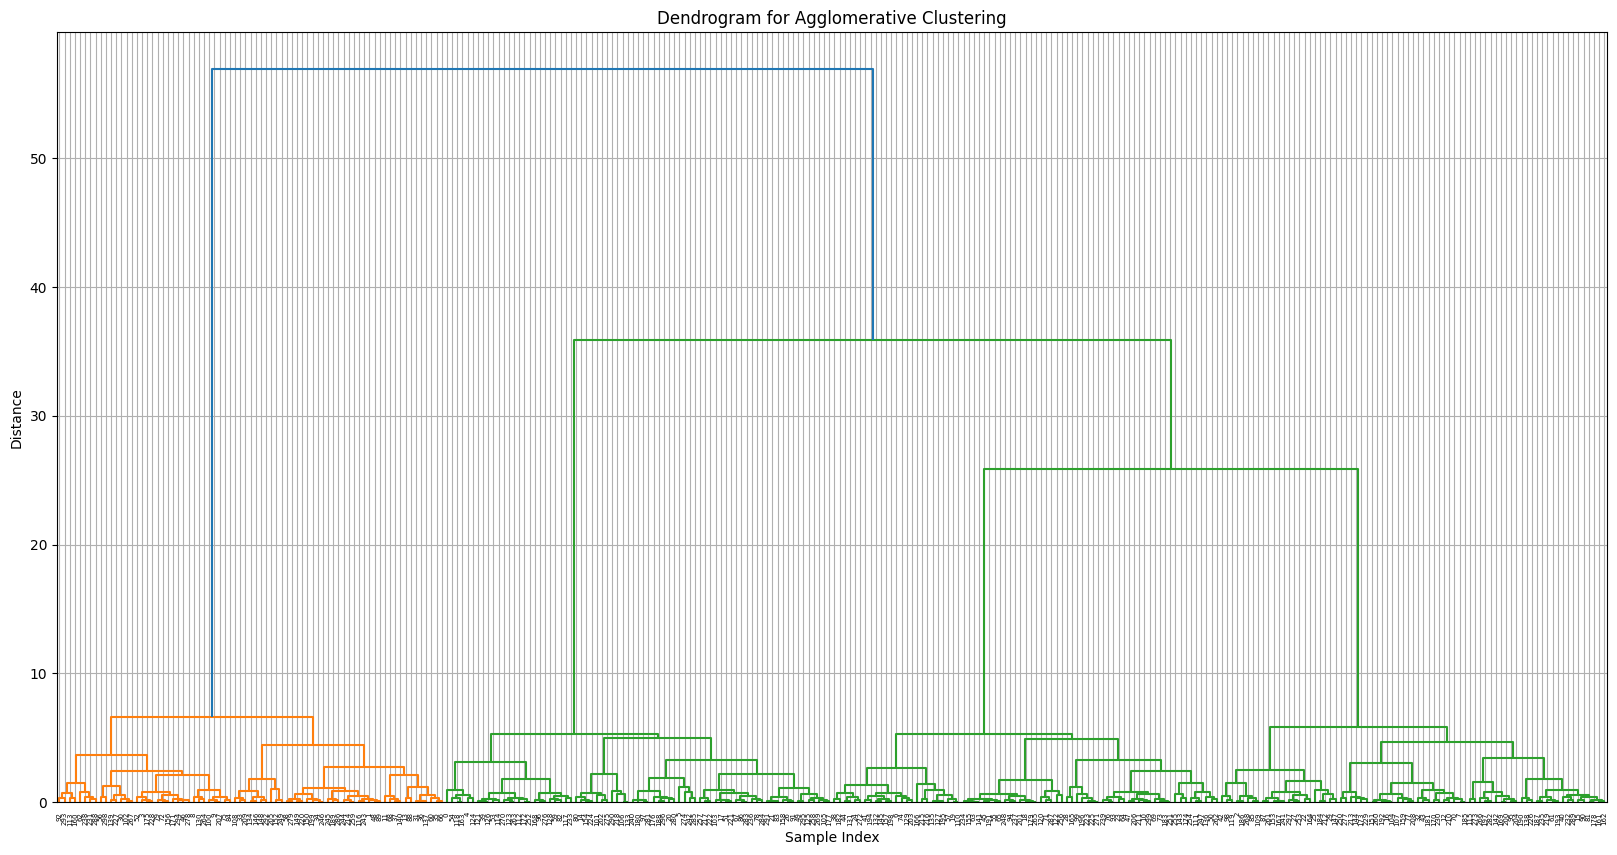

In [14]:
import scipy.cluster.hierarchy as sch

# Create the linkage matrix
linkage_matrix = sch.linkage(X, method='ward')

# Plot the dendrogram with increased width
plt.figure(figsize=(20, 10))  # Adjust the width as needed
sch.dendrogram(linkage_matrix)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


 The dendrogram above represents the hierarchical clustering of the data points using Agglomerative Clustering.
 Each merge in the dendrogram represents the joining of two clusters or data points based on their distance.
 The y-axis shows the distance or dissimilarity between clusters, with larger distances indicating less similarity.
 By examining the dendrogram, we can determine the optimal number of clusters by looking for the largest vertical distance
 that does not intersect any horizontal line. This is often referred to as the "elbow" method.
 In this case, we can observe that there are distinct clusters formed at various levels of the hierarchy,
 providing insight into the structure and relationships within the data.


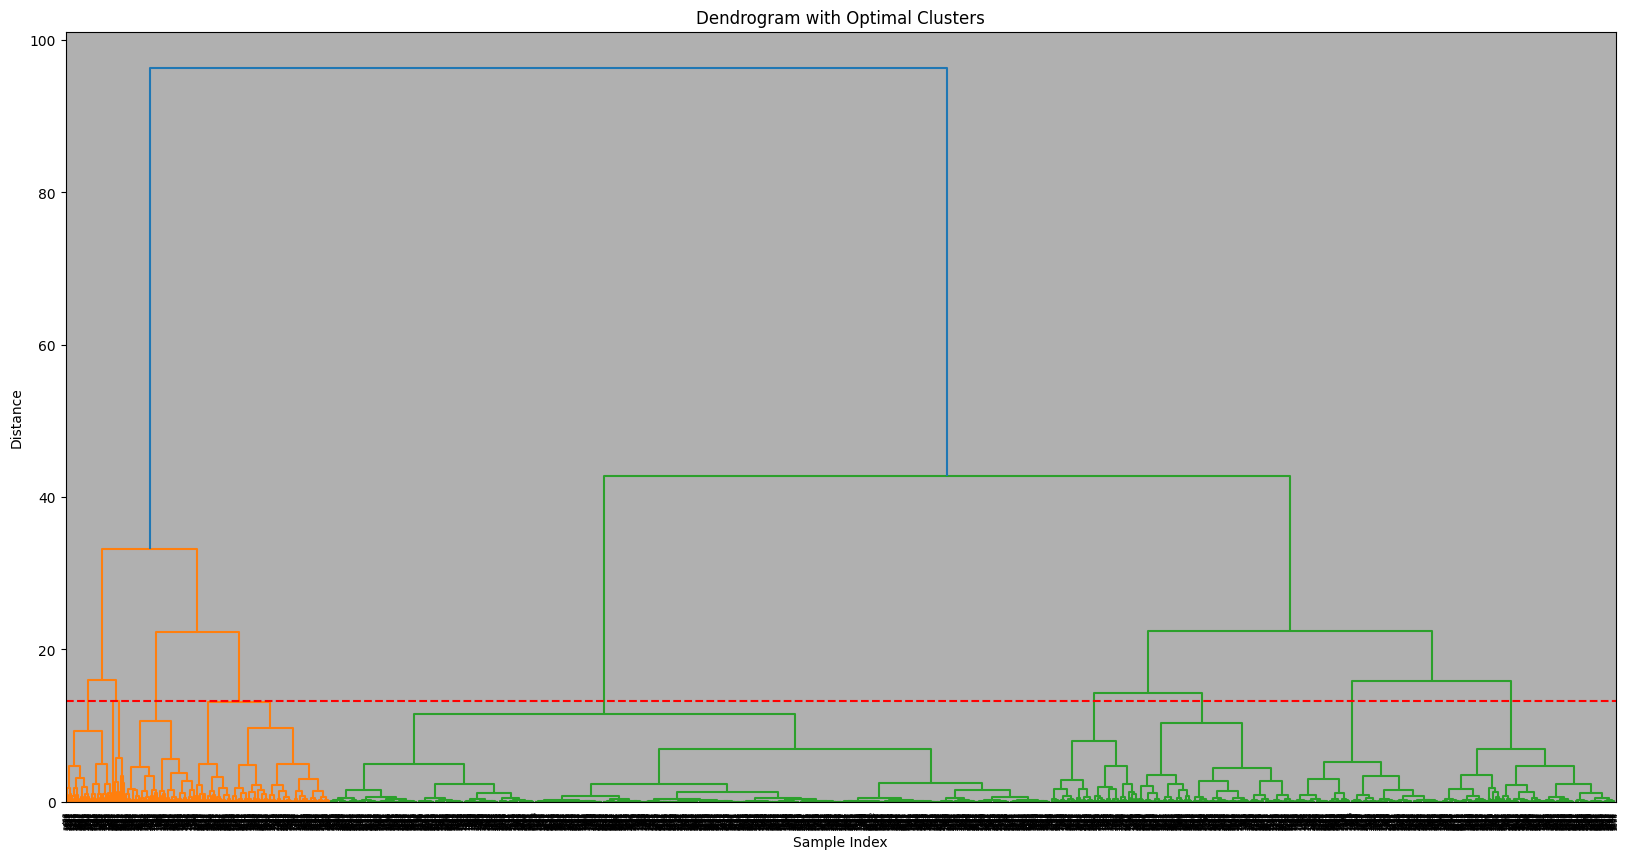

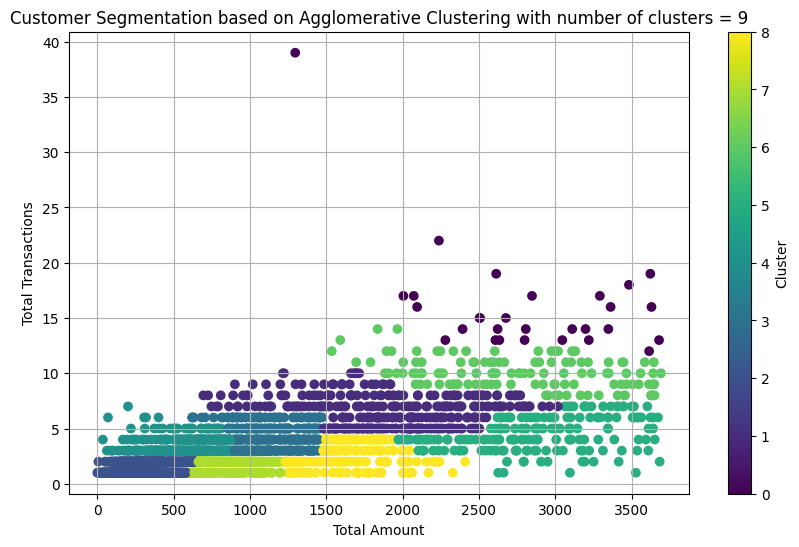

In [25]:
# Based on the dendrogram, we can determine the optimal number of clusters by looking for the largest vertical distance that does not intersect any horizontal line.
# This is often referred to as the "elbow" method. Let's visualize the clusters on the dendrogram.

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Assuming df_segmentation is your DataFrame with 'TotalAmount' and 'TotalTransactions'
# Recompute X from df_segmentation
X = df_segmentation[['TotalAmount', 'TotalTransactions']].values

# Standardize the data if necessary
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create the linkage matrix
linkage_matrix = sch.linkage(X_scaled, method='ward')

# Plot the dendrogram with a horizontal line to indicate the optimal number of clusters
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(linkage_matrix)
# Automatically determine the optimal number of clusters by finding the largest vertical distance that does not intersect any horizontal line
last = linkage_matrix[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
# Calculate the second derivative of the distances to find the acceleration
acceleration = np.diff(last, 2)
# Reverse the acceleration array to find the point where the change is maximum
acceleration_rev = acceleration[::-1]
# Determine the initial number of clusters based on the maximum acceleration point
initial_k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters

# Find the largest gap in the sorted distances to adjust the number of clusters more clearly
gaps = np.diff(last_rev)
# Determine the final number of clusters based on the largest gap
final_k = gaps.argmax() + 1  # the position of the largest gap + 1 gives the number of clusters

# Use the final number of clusters
k = final_k
plt.axhline(y=last_rev[k-1], color='r', linestyle='--')
plt.title('Dendrogram with Optimal Clusters')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

# Fit the Agglomerative Clustering model with the optimal number of clusters
n_clusters = k  # Use the optimal number of clusters determined from the dendrogram
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
clusters = agg_clustering.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df_segmentation['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_segmentation['TotalAmount'], df_segmentation['TotalTransactions'], c=df_segmentation['Cluster'], cmap='viridis')
plt.title(f'Customer Segmentation based on Agglomerative Clustering with number of clusters = {k}')
plt.xlabel('Total Amount')
plt.ylabel('Total Transactions')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

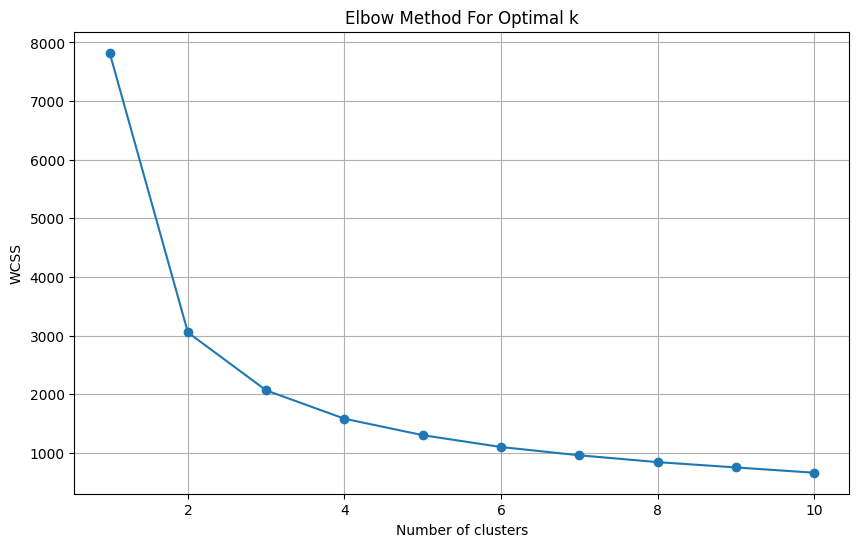

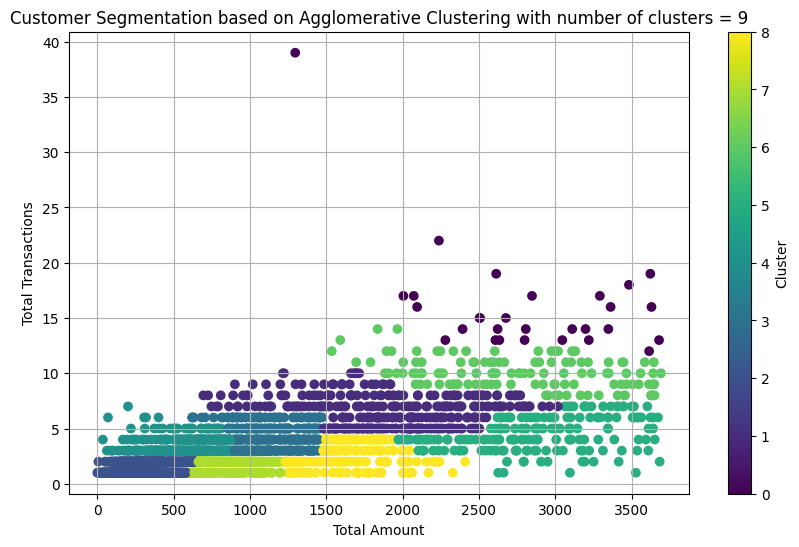

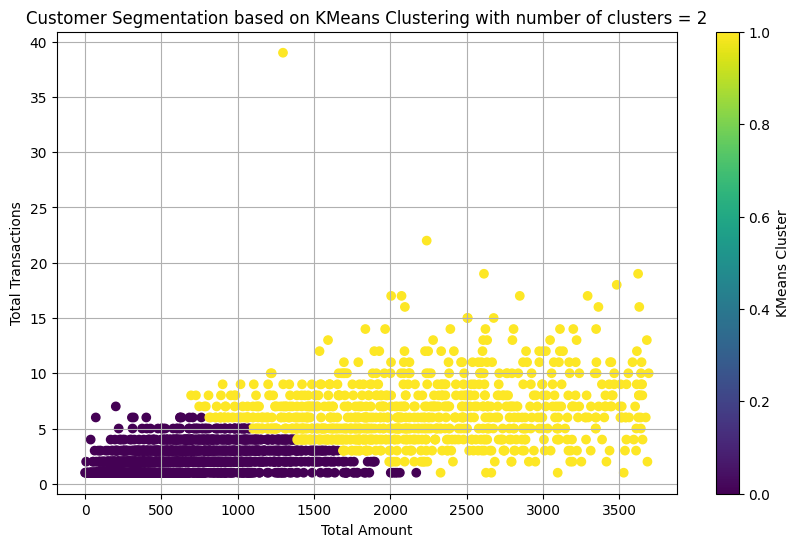

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Based on the elbow method, choose the optimal number of clusters
# Calculate the optimal number of clusters based on the elbow method
# The current method calculates the optimal number of clusters by checking where the decrease in WCSS (within-cluster sum of squares) starts to slow down.
# It does this by comparing the differences between consecutive WCSS values and finding the point where the difference decreases significantly.

# This method can be improved by using the second derivative (i.e., the rate of change of the rate of change) to find the "elbow" point more accurately.

import numpy as np

# Calculate the second derivative of the WCSS values
second_derivative = np.diff(np.diff(wcss))

# Find the index of the maximum second derivative, which indicates the "elbow" point
optimal_k = np.argmax(second_derivative) + 2  # Adding 2 because np.diff reduces the length by 2


# Fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_scaled)

# Add the KMeans cluster labels to the original dataframe
df_segmentation['KMeans_Cluster'] = kmeans_clusters

# Visualize the clusters from Agglomerative Clustering
plt.figure(figsize=(10, 6))
plt.scatter(df_segmentation['TotalAmount'], df_segmentation['TotalTransactions'], c=df_segmentation['Cluster'], cmap='viridis')
plt.title(f'Customer Segmentation based on Agglomerative Clustering with number of clusters = {k}')
plt.xlabel('Total Amount')
plt.ylabel('Total Transactions')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Visualize the clusters from KMeans Clustering
plt.figure(figsize=(10, 6))
plt.scatter(df_segmentation['TotalAmount'], df_segmentation['TotalTransactions'], c=df_segmentation['KMeans_Cluster'], cmap='viridis')
plt.title(f'Customer Segmentation based on KMeans Clustering with number of clusters = {optimal_k}')
plt.xlabel('Total Amount')
plt.ylabel('Total Transactions')
plt.colorbar(label='KMeans Cluster')
plt.grid(True)
plt.show()


In [29]:
# Based on the information provided and the large difference in the number of clusters between the two methods (Agglomerative Clustering and KMeans Clustering), 
# it is important to evaluate which method provides better segmentation.
# One way to determine this is by comparing the silhouette scores of the clusters formed by each method. 
# The silhouette score measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters.
# Calculate the silhouette scores for both clustering methods and compare them to decide which method to choose.
from sklearn.metrics import silhouette_score

# Calculate silhouette score for Agglomerative Clustering
agglo_silhouette_score = silhouette_score(X_scaled, df_segmentation['Cluster'])

# Calculate silhouette score for KMeans Clustering
kmeans_silhouette_score = silhouette_score(X_scaled, df_segmentation['KMeans_Cluster'])

# Print the silhouette scores
print(f'Silhouette Score for Agglomerative Clustering: {agglo_silhouette_score}')
print(f'Silhouette Score for KMeans Clustering: {kmeans_silhouette_score}')

# Choose the method with the higher silhouette score
if kmeans_silhouette_score > agglo_silhouette_score:
    print(f'KMeans Clustering with {optimal_k} clusters is better.')
else:
    print(f'Agglomerative Clustering with {k} clusters is better.')


Silhouette Score for Agglomerative Clustering: 0.4119960052226998
Silhouette Score for KMeans Clustering: 0.6327220004327212
KMeans Clustering with 2 clusters is better.


In [35]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, estimate_bandwidth, SpectralClustering, AffinityPropagation
import pandas as pd

# Define a function to calculate silhouette score for different clustering methods
def calculate_silhouette_score(X, labels):
    if len(set(labels)) > 1:
        return silhouette_score(X, labels)
    else:
        return -1  # Return -1 if only one cluster is found

# Initialize a dictionary to store the results
results = {
    'Clustering Method': [],
    'Number of Clusters': [],
    'Silhouette Score': []
}

# KMeans Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
results['Clustering Method'].append('KMeans')
results['Number of Clusters'].append(optimal_k)
results['Silhouette Score'].append(calculate_silhouette_score(X_scaled, kmeans_labels))

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=k)
agglo_labels = agglo.fit_predict(X_scaled)
results['Clustering Method'].append('Agglomerative')
results['Number of Clusters'].append(k)
results['Silhouette Score'].append(calculate_silhouette_score(X_scaled, agglo_labels))

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
results['Clustering Method'].append('DBSCAN')
results['Number of Clusters'].append(len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0))
results['Silhouette Score'].append(calculate_silhouette_score(X_scaled, dbscan_labels))

# MeanShift Clustering
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2, n_samples=500)
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_labels = meanshift.fit_predict(X_scaled)
results['Clustering Method'].append('MeanShift')
results['Number of Clusters'].append(len(set(meanshift_labels)))
results['Silhouette Score'].append(calculate_silhouette_score(X_scaled, meanshift_labels))

# Spectral Clustering
# Use RBF kernel for affinity
spectral = SpectralClustering(n_clusters=optimal_k, random_state=42, affinity='rbf')
spectral_labels = spectral.fit_predict(X_scaled)
results['Clustering Method'].append('Spectral')
results['Number of Clusters'].append(optimal_k)
results['Silhouette Score'].append(calculate_silhouette_score(X_scaled, spectral_labels))

# Affinity Propagation Clustering
# Increase max_iter and adjust damping
affinity = AffinityPropagation(random_state=42, max_iter=500, damping=0.9)
affinity_labels = affinity.fit_predict(X_scaled)
results['Clustering Method'].append('AffinityPropagation')
results['Number of Clusters'].append(len(set(affinity_labels)))
results['Silhouette Score'].append(calculate_silhouette_score(X_scaled, affinity_labels))

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)
# Determine which clustering method is better based on the highest silhouette score
best_method_index = results_df['Silhouette Score'].idxmax()
best_method = results_df.iloc[best_method_index]

print(f"The best clustering method is {best_method['Clustering Method']} with {best_method['Number of Clusters']} clusters and a silhouette score of {best_method['Silhouette Score']:.4f}.")




     Clustering Method  Number of Clusters  Silhouette Score
0               KMeans                   2          0.632722
1        Agglomerative                   9          0.411996
2               DBSCAN                   1          0.750290
3            MeanShift                   6          0.623046
4             Spectral                   2          0.643049
5  AffinityPropagation                  75          0.526492
The best clustering method is DBSCAN with 1 clusters and a silhouette score of 0.7503.


<a name="ex_6"></a>
# Exercise 6: Adjust K-Means Parameters

- Experiment with different values of n_clusters (other than 6) to see how they affect the segmentation. You can also adjust other parameters like init, n_init, or max_iter to observe their impact.
- Use silhouette scores to evaluate the segmentation quality for different numbers of clusters or parameter settings. Compare these scores to determine which configuration seems to have the best balance between cluster cohesion and separation.
- Summarize how changes in the number of clusters or other K-Means parameters impact the customer segmentation.

In [39]:
# Write your code here
# Experiment with different values of n_clusters, init, n_init, and max_iter for K-Means
from sklearn.metrics import silhouette_score as skl_silhouette_score

# Function to calculate the silhouette score for a given set of labels
# Returns -1 if there is only one cluster, as silhouette score is not defined in that case
def calculate_silhouette_score(X, labels):
    if len(set(labels)) > 1:
        return skl_silhouette_score(X, labels)
    else:
        return -1

# Dictionary to store the results of K-Means clustering experiments
kmeans_results = {
    'n_clusters': [],  # List to store the number of clusters used in each experiment
    'init': [],        # List to store the initialization method used ('k-means++' or 'random')
    'n_init': [],      # List to store the number of times the algorithm is run with different centroid seeds
    'max_iter': [],    # List to store the maximum number of iterations for a single run
    'Silhouette Score': []  # List to store the silhouette score for each configuration
}

# Different options for the number of clusters to test
n_clusters_options = [3, 4, 5, 6, 7, 8]
# Different initialization methods to test
init_options = ['k-means++', 'random']
# Different numbers of initializations to test
n_init_options = [10, 20, 30]
# Different maximum iterations to test
max_iter_options = [300, 400, 500]

# Iterate over all combinations of the above options
for n_clusters in n_clusters_options:
    for init in init_options:
        for n_init in n_init_options:
            for max_iter in max_iter_options:
                # Create a KMeans instance with the current set of parameters
                kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, random_state=42)
                # Fit the model and predict the cluster labels
                kmeans_labels = kmeans.fit_predict(X_scaled)
                # Calculate the silhouette score for the current clustering
                silhouette_score = calculate_silhouette_score(X_scaled, kmeans_labels)
                
                # Append the current parameters and silhouette score to the results dictionary
                kmeans_results['n_clusters'].append(n_clusters)
                kmeans_results['init'].append(init)
                kmeans_results['n_init'].append(n_init)
                kmeans_results['max_iter'].append(max_iter)
                kmeans_results['Silhouette Score'].append(silhouette_score)

# Create a DataFrame to display the K-Means results
kmeans_results_df = pd.DataFrame(kmeans_results)
print(kmeans_results_df)

# Determine which K-Means configuration is better based on the highest silhouette score
best_kmeans_index = kmeans_results_df['Silhouette Score'].idxmax()
best_kmeans = kmeans_results_df.iloc[best_kmeans_index]

print(f"The best K-Means configuration is with {best_kmeans['n_clusters']} clusters, init='{best_kmeans['init']}', n_init={best_kmeans['n_init']}, max_iter={best_kmeans['max_iter']} and a silhouette score of {best_kmeans['Silhouette Score']:.4f}.")



     n_clusters       init  n_init  max_iter  Silhouette Score
0             3  k-means++      10       300          0.543752
1             3  k-means++      10       400          0.543752
2             3  k-means++      10       500          0.543752
3             3  k-means++      20       300          0.543752
4             3  k-means++      20       400          0.543752
..          ...        ...     ...       ...               ...
103           8     random      20       400          0.438140
104           8     random      20       500          0.438140
105           8     random      30       300          0.438140
106           8     random      30       400          0.438140
107           8     random      30       500          0.438140

[108 rows x 5 columns]
The best K-Means configuration is with 3 clusters, init='random', n_init=10, max_iter=300 and a silhouette score of 0.5439.
